<a href="https://colab.research.google.com/github/tanerijun/ml-training/blob/main/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and import dependencies

In [ ]:
!pip install fastai
!pip install fastbook

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

Helper function to search for images from DuckDuckGo. Imported from fastbook

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
res = search_images_ddg('grizzly bear')
res # returns links

(#200) ['https://wallpaperset.com/w/full/9/e/5/49402.jpg','https://c8.alamy.com/comp/2D9CJWA/grizzly-bear-2D9CJWA.jpg','https://a-z-animals.com/media/2021/07/Grizzly-Bear-e1652377327826.jpg','http://wallpaper.imcphoto.net/animals/grizzly-bear/giant-grizzly-bear.jpg','https://www.wildnatureimages.com/images/xl/160626-059-Grizzly-Bear-Cub.jpg','http://wallsdesk.com/wp-content/uploads/2017/01/Grizzly-Bear-Computer-Wallpaper.jpg','https://s.hdnux.com/photos/01/32/07/32/23623324/3/1200x0.jpg','https://stoysnetcdn.com/schl/schl14685/schl14685_4.jpg','https://www.planetcustodian.com/wp-content/uploads/2021/04/pizzly_bear_1-768x511.jpg','https://s3.wp.wsu.edu/uploads/sites/1996/2016/07/Grizzly-Grisly.jpg'...]

Preview one of the images
1. Download the image

In [ ]:
dest = 'images/grizzly.jpg'
download_url(res[1], dest)

Path('images/grizzly.jpg')

2. Show the image

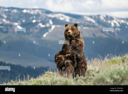

In [ ]:
im = Image.open(dest)
im.to_thumb(128, 128)

Image come from PIL

In [ ]:
Image

<module 'PIL.Image' from '/usr/local/lib/python3.10/dist-packages/PIL/Image.py'>

Let’s use fastai’s `download_images` to download all the URLs for each of our search terms. We’ll put each in a separate folder:


In [ ]:
download_images

<function fastai.vision.utils.download_images(dest, url_file=None, urls=None, max_pics=1000, n_workers=8, timeout=4, preserve_filename=False)>

In [ ]:
bear_types = ['grizzly', 'black', 'teddy']
path = Path('bears')

if not path.exists():
    path.mkdir() # create path "bears"
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True) # create path "bears/grizzly, bears/black, ..."
        res = search_images_ddg(f'{o} bear') # search for bear images from DDG
        download_images(dest, urls=res) # pass in the urls and download

List image files we downloaded

In [ ]:
get_image_files

<function fastai.data.transforms.get_image_files(path, recurse=True, folders=None)>

In [ ]:
fns = get_image_files(path) # filenames
fns

(#556) [Path('bears/black/658d0d62-9e28-4f4f-a12d-33d37b3b5259.jpg'),Path('bears/black/d07bc108-3d4c-4fcf-91dd-fb760e305764.jpg'),Path('bears/black/1c5c672e-5e57-4e50-af5c-7e43b8da6e3b.jpg'),Path('bears/black/d803e49c-0cc9-4f15-bf7a-bd51935e6f2c.jpg'),Path('bears/black/f2a1d374-2c6a-4e58-bc6a-500d0fbc9cba.jpg'),Path('bears/black/4e883eaf-a7c0-4357-a86c-3e045f02511c.jpg'),Path('bears/black/0e9930ce-f320-4dea-9608-69a757ecca2c.jpg'),Path('bears/black/3280bf71-d0fa-4613-8ffd-0713a8ad0791.jpg'),Path('bears/black/90749d50-db30-418a-96a3-8be278e014e1.jpg'),Path('bears/black/ef88e5b3-1179-4285-9e86-b18f546afdf4.jpg')...]

Often when we download files from the internet, a few are corrupt. Let’s check:

In [ ]:
verify_images

<function fastai.vision.utils.verify_images(fns)>

In [ ]:
failed = verify_images(fns)
failed

(#41) [Path('bears/black/7d170e2a-ea2f-475a-af05-ebdc1c2b5bca.jpg'),Path('bears/black/d9742eb3-f755-4301-8b3f-926b1b9bc9c0.jpg'),Path('bears/black/93042d3f-4b39-49ff-bedb-5b6bc63e20eb.JPG'),Path('bears/black/c47d0ddc-675b-4f85-9882-1ac1ab862228.jpg'),Path('bears/black/b3de7c9a-feff-46e5-909c-a82822eef98c.jpg'),Path('bears/black/e4f560f1-00aa-4e6d-a660-b4014867f9db.jpg'),Path('bears/black/8d1c891b-0cb7-4ab0-8168-7dfb6beb4a15.jpg'),Path('bears/black/9348295e-ca6d-4dab-abca-a556b6223f6b.jpg'),Path('bears/black/38d17b09-7ccd-4a1c-955a-95d4f4acdc46.jpg'),Path('bears/black/84ba6251-6c6b-438e-adf5-8bc78c5a847c.jpg')...]

The L object from fastai comes with some utils method

In [ ]:
type(failed)

fastcore.foundation.L

Remove them

In [ ]:
failed.map(Path.unlink)

(#41) [None,None,None,None,None,None,None,None,None,None...]

Creating DataLoaders

In [ ]:
DataLoaders

fastai.data.core.DataLoaders

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
bears

First we provide a tuple specifying the types we want for the independent and dependent variables:
```
blocks=(ImageBlock, CategoryBlock)
```

- Independent variable: the thing we are using to make prediction from
- Dependent variable: our target

In our case:
- Independent variable: images of bears
- Dependent variable: categories (types) of bears

For this DataLoaders, our underlying items will be file paths. We have to tell fastai how to get a list of those files. The get_image_files function takes a path, and returns a list of all of the images in that path (recursively, by default):
```
get_items=get_image_files
```

In [ ]:
res = get_image_files('.')
res

(#516) [Path('bears/black/658d0d62-9e28-4f4f-a12d-33d37b3b5259.jpg'),Path('bears/black/d07bc108-3d4c-4fcf-91dd-fb760e305764.jpg'),Path('bears/black/1c5c672e-5e57-4e50-af5c-7e43b8da6e3b.jpg'),Path('bears/black/d803e49c-0cc9-4f15-bf7a-bd51935e6f2c.jpg'),Path('bears/black/f2a1d374-2c6a-4e58-bc6a-500d0fbc9cba.jpg'),Path('bears/black/4e883eaf-a7c0-4357-a86c-3e045f02511c.jpg'),Path('bears/black/0e9930ce-f320-4dea-9608-69a757ecca2c.jpg'),Path('bears/black/3280bf71-d0fa-4613-8ffd-0713a8ad0791.jpg'),Path('bears/black/90749d50-db30-418a-96a3-8be278e014e1.jpg'),Path('bears/black/ef88e5b3-1179-4285-9e86-b18f546afdf4.jpg')...]

Split 20% our data into training and validation sets randomly. The seed is to make sure we got the same exact list each time
```
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

The independent variable is often referred to as `x`, and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset:
```
get_y=parent_label
```
`parent_label` is a function provided by fastai that simply gets the name of the folder a file is in

In [ ]:
parent_label

<function fastai.data.transforms.parent_label(o)>

This command has given us a DataBlock object. Which is a template for creating DataLoaders. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

In [ ]:
dls = bears.dataloaders(path)
dls

A DataLoaders includes validation and training DataLoaders.
We can take a look at a few of those items by calling the show_batch method on a DataLoader:

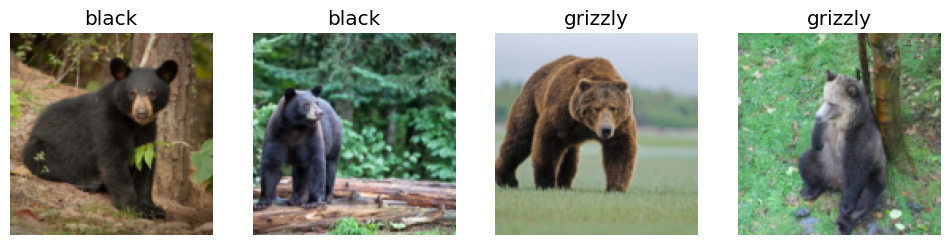

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

New `bears` with different transform

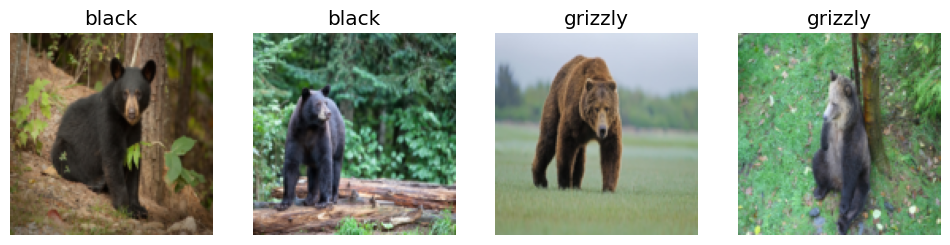

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

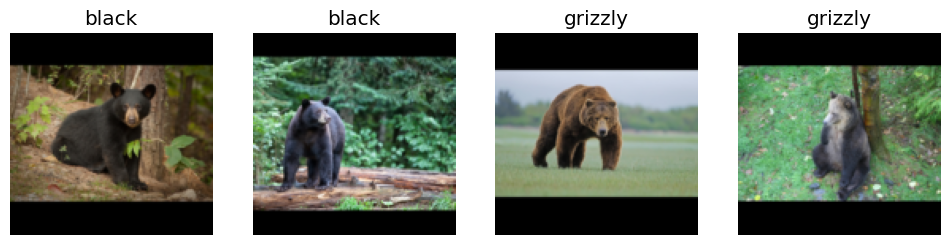

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

All of these approaches seem somewhat wasteful or problematic. If we squish or stretch the images, they end up as unrealistic shapes, leading to a model that learns that things look different from how they actually are, which we would expect to result in lower accuracy. If we crop the images, we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images, we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image and then crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset), we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

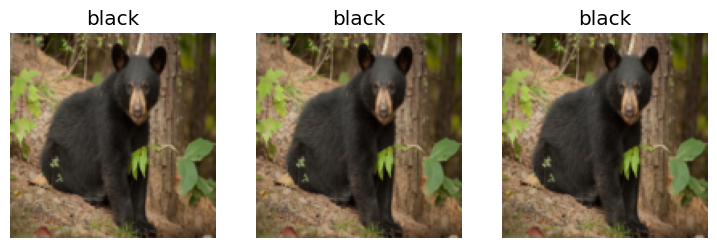

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # min_scale determines how much of the image to select at minimum each time
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=3, nrows=1, unique=True)

Common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes, and contrast changes.

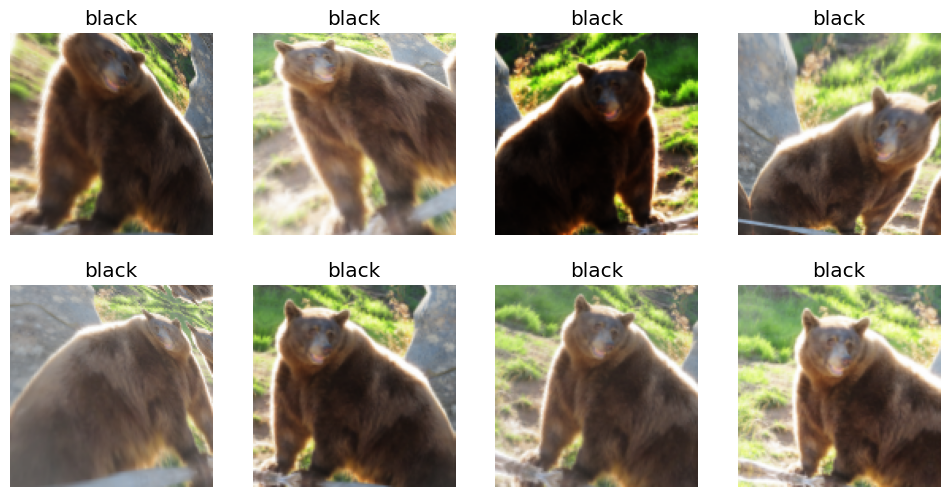

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

> Tips: Train model first, then clean data, so we know better which data to clean
### Time to train

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Create confusion matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp

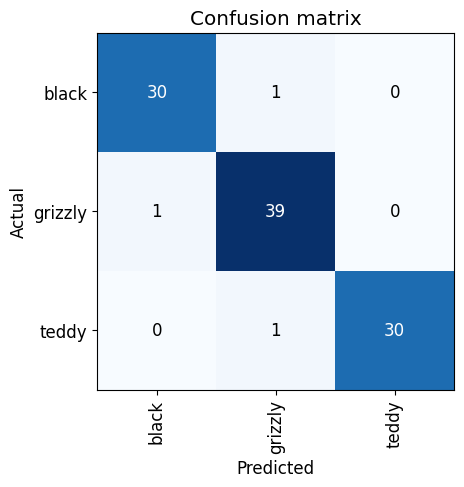

In [ ]:
interp.plot_confusion_matrix()

Reasons for error:
- dataset problem (e.g images that aren't bear or incorrect label)
- model problem (perhaps it doesn't handle images with unusual lighting, different angle, etc)

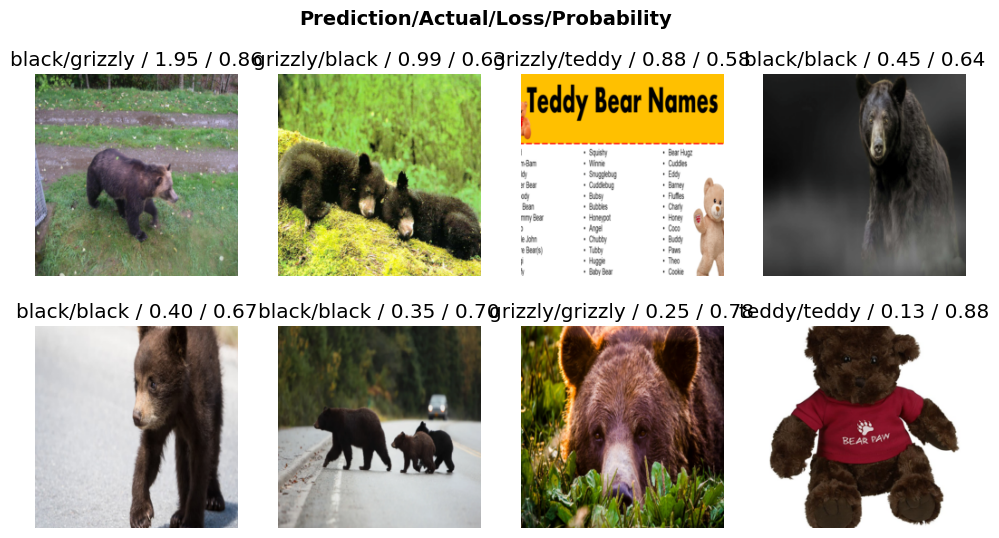

In [ ]:
# plot_top_losses shows us the images with the highest loss in our dataset
interp.plot_top_losses(8, nrows=2) # prediction, actual (target label), loss, and probability

Select images to modify

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# Delete images
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# Change categories
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Save model

In [ ]:
learn.export()

Check that it's saved successfully

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

This is the file we need to put in our production server

Let's create a simple app within this notebook!

> When we use a model for getting predictions, instead of training, we call it _inference_.

In [ ]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('images/grizzly.jpg') # returns (category, index, probabilities of each category)

('grizzly', tensor(1), tensor([4.9346e-07, 9.9999e-01, 5.3160e-06]))

In [ ]:
learn_inf.dls.vocab # In this case, index 0 = black, 1 = grizzly, 2 = teddy

['black', 'grizzly', 'teddy']

## Using the Model
To use our model in production, we simply use the _predict_ method as regular function.

Our GUI tools:
- IPython widgets (ipywidgets)
- Voilà

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred, pred_index, probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_index]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9906')

In [ ]:
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)
btn_run

Button(description='Classify', style=ButtonStyle())

Now that we have all the components, let's build the GUI

In [ ]:
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run, out_pl, lbl_pred])